# Screen Time in the Daily life of a GU Student

## 1. Introduction

* My project domain is the iPhone's built in screen time recording feature. The dataset I am using spans from February 13 to April 14 2022. The dataset consists of the date, total screen time, social, information and reading, entertainment, productivity and finance, and other for screen time data. The data is shown in minutes, and the day of the week is encorportated into the dataset. 

* My null hypothesis is that Friday and Saturday will have the most total screen time average.

* and my alternative hypothesis is that the total screen time will be lowest on wednesday since I usually use wednesday as a homework day. 

a. The iPhone data recording domain is important to me because the iPhone is somewhat known for its security. I wanted to research this domain to see if it really is as secure as people think, and I wanted to see if they were giving my screen time data away, or specific app screen time data away. 

b. The dataset format is in CSV

c. Table 1 is the date and screen time data, and table 2 is the date and day of the week data. 
* i. The data for each table was typed into google sheets manually, however my phone automatically recorded all the screen time data in the settings app. The day of the week data was collected manually
* ii. both tables have 61 instances exactly.

d. 5 of the attributes is one of the categories of recorded screen time in minutes. The 6th Attribute is the date in the formate (mm/dd/yy), the only other attribute in the days of week table, is the day of the week as a string. 

e. I am trying to classify what day of the week or date it is, given an random or chosen instance of data.

f. The potential impacts would infer higher or lower screen time on specfic days. Which would then cause myself to rethink how often I am on my phone. 

g. The stakeholders interested would be first and foremost Apple. Since they could use my results to reel me in on specific days to be more active. The other stakeholders interested would be the app developers that fall into the specific categories (attributes), and they could do the same as apple. Reel me in on specific days that I use that category more than other. 

### narrative describing the input and the code

In [2]:
import pandas as pd

phone_df = pd.read_csv("phone_data.csv", index_col = 0)
days_week_df = pd.read_csv("days_of_week.csv", index_col=0)

start_date = input("Enter start Date: ")
end_date = input("Enter end date: ") 

date_select = pd.DataFrame(phone_df.loc[start_date:end_date])
print(date_select)

user_selected_stat = input('Please choose a column from the above stats: ')
stat_series = pd.Series(date_select[user_selected_stat])

sum = stat_series.sum()
mean = stat_series.mean()
std = stat_series.std()
median = stat_series.median()
min = stat_series.min()
max = stat_series.max()

print()
print("You chose:", user_selected_stat, "which is shown below with the corresponding dates")

print(stat_series)


        Screen Time Total (minutes)  Social (minutes)  \
Date                                                    
4/4/22                          394               105   
4/5/22                          344               136   

        Information & Reading (Minutes)  Other (minutes)  \
Date                                                       
4/4/22                               97               42   
4/5/22                               13               71   

        Entertainment (minutes)  Productivity and Finance  
Date                                                       
4/4/22                      134                        16  
4/5/22                       92                        32  

You chose: Social (minutes) which is shown below with the corresponding dates
Date
4/4/22    105
4/5/22    136
Name: Social (minutes), dtype: int64


## 2. Data Analysis

* The data set consists of the date, Screen Time Total, Social category,Information & Reading, Entertainment, Productivity and Finance, and Other. The data preparation took some time since I had to manually type in all the data recorded into a google sheet. The exploratory data analysis I performed is shown in the visualizations and the different categories and such explored in them, adn the statistics of any said category. 

a. Surprisingly, I did not have to do any serious data cleaning for missing values. All values were accounted for via screenshots once a week. I would then type in the values to a google spreadsheet after the week had concluded and each value was loaded in. Some minor cleaning I did was rounded up the "other" category to one mintue whenever it read greater than 30 seconds of time.

b. I am merging tables using an outer join

c. The challenges with data preparation was the tediousness that came with typing 366 different values into a google spreadsheet. 

d. I am using the collation and presentation aspects of the data aggregation techniques. I am collecting the data and presenting it in a summarized manner


### narrative describing the output and your insights

In [8]:
stats_dict = {'Stats':['Sum', 'Mean','Std Deviation','Median','Min','Max'], 'Number': [sum, mean, std, median, min, max]}
stats_dict_df = pd.DataFrame(stats_dict)

stats_dict_df.to_csv("output_phone_data.csv", header = False, index = False, float_format = "%.2f")

merged_df = phone_df.merge(days_week_df, on=["Date"], how = 'outer')
merged_df.to_csv("data_merged_df.csv")

grouped_by_day = merged_df.groupby("Day of Week", sort = False)


mean_user_ser = pd.Series(dtype=float)

for group_name, date_select in grouped_by_day:
    group_mean_pop = date_select[user_selected_stat].mean()
    mean_user_ser[group_name] = group_mean_pop
mean_user_ser.name = "Mean per day of the week:", user_selected_stat

print()
print("And here is the average number of", user_selected_stat, "for each day of the week")
print()
print(mean_user_ser)



And here is the average number of Social (minutes) for each day of the week

Sunday       169.777778
Monday       134.000000
Tuesday      171.555556
Wednesday    132.333333
Thursday     136.444444
Friday       183.875000
Saturday     163.000000
Name: (Mean per day of the week dsjkfsdf:, Social (minutes)), dtype: float64


### 2. 

e. the visualizations below use the bar and line graphs to represent different attributes and their relation to the days of the week. Or in some cases, the date. The graphs use the average screen time (either total or categorical) and graph them accordingly compared to day of the week/date. 

f. The statistical hypothesis test I am computing is an accuracy score on the classification using kNN, and I am also calculating the average screen time per day (in minutes) for any given category that the user chooses. The results for said calculations appear directly above. 

<AxesSubplot:xlabel='Date'>

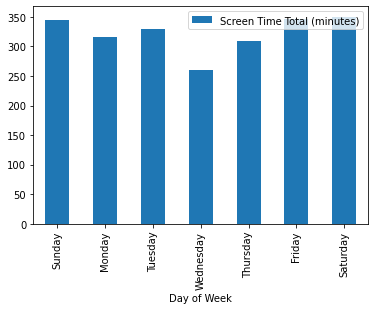

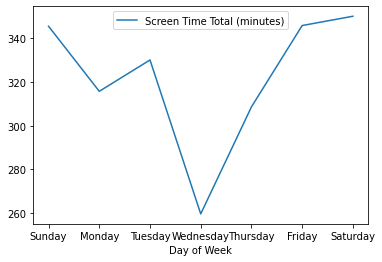

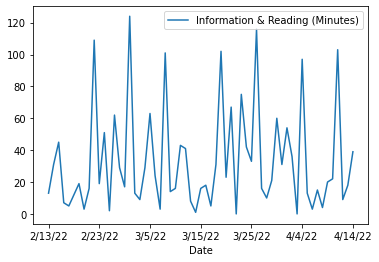

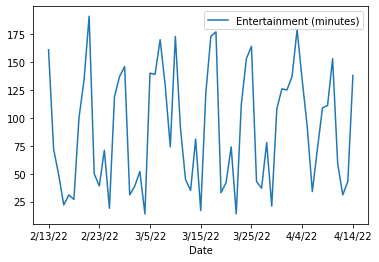

In [60]:
import matplotlib as plt
import pandas as pd

phone_df = pd.read_csv("phone_data.csv", index_col = 0)
days_week_df = pd.read_csv("days_of_week.csv")
merged_df = phone_df.merge(days_week_df, on=["Date"], how = 'outer')

merged_df[['Day of Week', 'Screen Time Total (minutes)']].groupby('Day of Week', sort=False).mean().plot(kind='bar', legend=True)

merged_df[['Day of Week', 'Screen Time Total (minutes)']].groupby('Day of Week', sort=False).mean().plot(kind='line', legend=True)

merged_df[['Date', 'Information & Reading (Minutes)']].groupby('Date', sort=False).mean().plot(kind='line', legend=True)

merged_df[['Date', 'Entertainment (minutes)']].groupby('Date', sort=False).mean().plot(kind='line', legend=True)




In [6]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
phone_df = pd.read_csv("phone_data.csv")
days_week_df = pd.read_csv("days_of_week.csv")
merged_df = phone_df.merge(days_week_df, on=["Date"], how = 'outer')

X_train = phone_df.drop("Date", axis=1)
y_train = phone_df["Date"]

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_normalized = scaler.transform(X_train)

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_normalized, y_train)

X_test = pd.Series([330, 140, 35, 10, 100, 20], index=phone_df.columns.drop("Date"))
X_test = scaler.transform([X_test])
y_test_prediction = neigh.predict(X_test)
print(y_test_prediction)

['2/27/22']


In [10]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

phone_df = pd.read_csv("phone_data.csv")
days_week_df = pd.read_csv("days_of_week.csv")
merged_df = phone_df.merge(days_week_df, on=["Date"], how = 'outer')

merged_df = merged_df.drop("Date", axis=1)

X_train = merged_df.drop("Day of Week", axis=1)
y_train = merged_df["Day of Week"]

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_normalized = scaler.transform(X_train)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_normalized, y_train)

X_test = pd.Series([330, 140, 35, 10, 100, 20], index=merged_df.columns.drop("Day of Week"))
X_test = scaler.transform([X_test])
y_test_prediction = neigh.predict(X_test)
print(y_test_prediction)

['Sunday']


## 3. Classification Results

a. I am using the screen time in minutes (for all given attributes, 6 total) in order to predict the day of the week or date that it is closest to using kNN. 
* i. the distributions is 70% weekday, and 30% weekend. 

b. my hypotheses about the precitions is that kNN is choosing the closest date and day with the data provided for testing. 

c. I am evaluating them using the acccuracy score library from skLearn. The kNN results are 97% accurate according to the the accuracy score. 

d. the real challenge with classification for me was the tree classifier, I still did not fully understand the results of said tree and that was really a challenge for me wehn interpretting results. 

In [9]:
iris = datasets.load_iris() 
X, y = iris.data[:, :], iris.target
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0, train_size = 0.7)

scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_predicted = knn.predict(x_test)

print(accuracy_score(y_test, y_predicted))

0.9777777777777777


Tree!


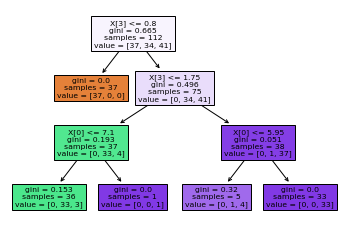

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = DecisionTreeClassifier(max_depth = 3, max_features = 0.65, splitter='best')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

tree.plot_tree(clf, max_depth = 3, filled = True)
print("Tree!")

## 4. Conclusion

a. I used the dataset iPhone screen time, which was fun and informative in the end. It was unfortunate that I was not able to directly export them, but typing them in manually probably took care of a lot of data cleaning steps. 

b. The approach I used was Loading the data, normalizing it, training the classifier, and then testing the kNN classifier on a test instance. The approach I described was the one used in class and in the lecture notes, I thought it was the best one to use so I went with this approach. My classifiers performance is very good from what I can tell, a 97% accuracy score to back it up. Although 97% is good, it is not 100, so there are ways to improve the performance. One idea I have would be to use a 12 month period of data, so that kNN has more instances to go off of. 

c. The potential impacts of my work could be use more unethically than ethically. Access to any users screen time in different categories on specific days of the week (or during a month) could be used to market ads on specific topics at a specific time. Stakeholders could use the data to shove an app in your face at one point in a month, when they know you are going to use it. If you ask me, it sounds pretty unethical.